<a href="https://colab.research.google.com/github/Azariagmt/pulmonary-disorder-detection-using-x-ray-images/blob/master/notebooks/multiclass-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intent of project

The novel coronavirus 2019 (COVID-2019) first appeared in Wuhan city of China in December 2019. It has spread rapidly all around the globe to have been finally declared a global pandemic by the World Health organization on the 11th of March 2020.

It is critical to detect the positive cases as early as possible so as to prevent the further spread of this pandemic and to quickly treat affected patients. The need for auxiliary diagnostic tools has increased as there are no accurate automated toolkits available. 

Even with glimpses of hope for a cure countries in Africa(more than 1.2 billion) people dont know when they'll get it, leaving dark days still ahead.

Covid-19 has resulted in countless numbers of lives lost, ruining multiple businesses all over the world and disrupting the global economy.

Recent findings obtained using radiology imaging techniques suggest that such images contain salient information about the COVID-19 virus. Thus we are here trying to prove that using x-ray images we can show whether or not someone has covid and the fact that they will be intubated, and go to the intensive care unit to receive treatment afterwards.

To make this a viable project going forward even after this pandemic is behind us we will try to build a multiclass classification model which will classify not only covid19 but other infections such as pneumonia, and tuberculosis.


## Imports

In [1]:
import numpy as np
import re
#from google_drive_downloader import GoogleDriveDownloader as gdd
!pip install opencv-python
import cv2
import os
import matplotlib.pyplot as plt
#import gdown
#from google.colab import files
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools

In [29]:
!pip install tensorflow==2.3.0

     |████████████████████████████████| 136 kB 11.5 MB/s eta 0:00:01
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.28.1 which is incompatible.
ERROR: google-api-core 1.26.3 has requirement six>=1.13.0, but you'll have six 1.12.0 which is incompatible.
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


In [82]:
# !pip install 'h5py<3.0.0'

     |████████████████████████████████| 2.9 MB 11.0 MB/s eta 0:00:01
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.2 which is incompatible.
ERROR: tensorflow-gpu 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: tensorflow-gpu 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.2 which is incompatible.
  Attempting uninstall: h5py
    Found existing installation: h5py 3.2.1
    Uninstalling h5py-3.2.1:
      Successfully uninstalled h5py-3.2.1
Note: you may need to restart the kernel to use updated packages.


## Explore and import the Data

The first step in any machine learning project is to explore the data that you will use to train a model. The goal of this exploration is to try to understand the relationships between its attributes; in particular, any apparent correlation between the features and the label your model will try to predict. This may require some work to detect and fix issues in the data (such as dealing with missing values, errors, or outlier values), deriving new feature columns by transforming or combining existing features (a process known as feature engineering), normalizing numeric features (values you can measure or count) so they're on a similar scale, and encoding categorical features (values that represent discrete categories) as numeric indicators.

### Common Dataset

Common dataset used for multiple cases is the COVID-19 Radiography Database dataset from kaggle

In [30]:
!pip install googledrivedownloader

In [4]:
!pip install gdown==3.8.0

     |████████████████████████████████| 75 kB 5.0 MB/s  eta 0:00:01
  Created wheel for gdown: filename=gdown-3.8.0-py3-none-any.whl size=8010 sha256=21e32a9c84c7c8d7061a693020a5d13576f769cc54f1d2b157598f612751301c
  Stored in directory: /home/ec2-user/.cache/pip/wheels/45/48/36/1ca9979749c026cae0e09f658d2ed20f22c957cc3bcf998a9c
Successfully built gdown


In [5]:
'''
Download files from remote url using gdown package
'''
#gdown.download('https://drive.google.com/file/d/1-0g4EZz4QnFeXIQRSMHYjIJtbTpctfgx/view?usp=sharing', output="pneumonia", quiet=False)
#gdown.download('https://drive.google.com/file/d/1-13BIFUpM-FB6xbYOwfjTQJ1xTNNNd9b/view?usp=sharing', output="tb", quiet=False)
#gdown.download('https://drive.google.com/file/d/1jNpAEiV00RqiT9o6wfhQHdXfftrEQusz/view?usp=sharing', output="covidxr", quiet=False)
!gdown --id '1jNpAEiV00RqiT9o6wfhQHdXfftrEQusz'
!gdown --id '1-13BIFUpM-FB6xbYOwfjTQJ1xTNNNd9b'
!gdown --id '1-0g4EZz4QnFeXIQRSMHYjIJtbTpctfgx'

Downloading...
From: https://drive.google.com/uc?id=1jNpAEiV00RqiT9o6wfhQHdXfftrEQusz
To: /home/ec2-user/SageMaker/pulmonary-disorder-detection-using-x-ray-images/notebooks/covid19 radiography DB.zip
781MB [00:06, 113MB/s]  
Downloading...
From: https://drive.google.com/uc?id=1-13BIFUpM-FB6xbYOwfjTQJ1xTNNNd9b
To: /home/ec2-user/SageMaker/pulmonary-disorder-detection-using-x-ray-images/notebooks/tb.zip
1.01GB [00:12, 78.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0g4EZz4QnFeXIQRSMHYjIJtbTpctfgx
To: /home/ec2-user/SageMaker/pulmonary-disorder-detection-using-x-ray-images/notebooks/paul mooney.zip
2.46GB [00:27, 90.2MB/s]


In [ ]:
#common covid19 radiography dataset
!unzip  "covid19 radiography DB.zip" -d "../datasets/"

#pneumonia dataset from paul mooney
!unzip -q "paul mooney.zip" -d "../datasets"

#tb dataset
!unzip -q "tb.zip" -d "../datasets"


# Global variables

In [7]:
COVID_CLASS = 0
BACTERIAL_PUEMONIA_CLASS = 1
VIRAL_PUEMONIA_CLASS = 2
TB_CLASS = 3
NORMAL_CLASS = 4
IMAGE_SIZE = 100 




### Dataset 1 - COVID | 3616
 
 name - COVID-19 Radiography Database <br />
 source - Kaggle  <br />
 link - https://www.kaggle.com/tawsifurrahman/covid19-radiography-database <br />
 download link - https://drive.google.com/u/0/uc?id=1ZMgUQkwNqvMrZ8QaQmSbiDqXOWAewwou&export=download
 drive link - https://drive.google.com/file/d/1jNpAEiV00RqiT9o6wfhQHdXfftrEQusz/view?usp=sharing
 

<br />
<br />


In [3]:
dir = '../datasets/COVID-19_Radiography_Dataset/COVID'
data_covid = []
denoised_data_covid = []

for filename in os.listdir(dir):
  img = cv2.imread(os.path.join(dir,filename), cv2.IMREAD_GRAYSCALE)
  if img is not None:
    new_img_array = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    data_covid.append([new_img_array, COVID_CLASS])
    denoised_data_covid.append([cv2.GaussianBlur(new_img_array,(5,5),0), COVID_CLASS])
print(len(os.listdir(dir)), "COVID FILES")

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/COVID-19_Radiography_Dataset/COVID'

In [104]:
len(data_covid)

3615

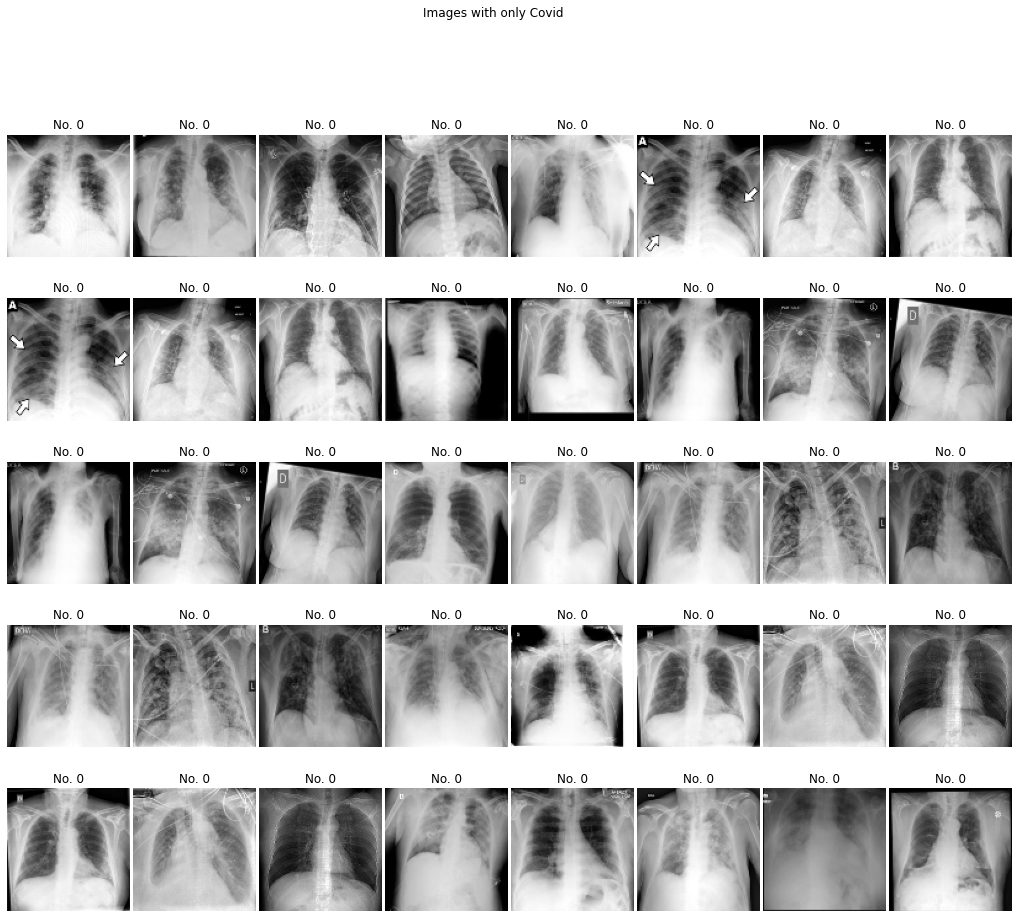

In [167]:
# code to view the images
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(data_covid[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % data_covid[image_index][1])

plt.suptitle('Images with only Covid')
plt.show()
plt.close()

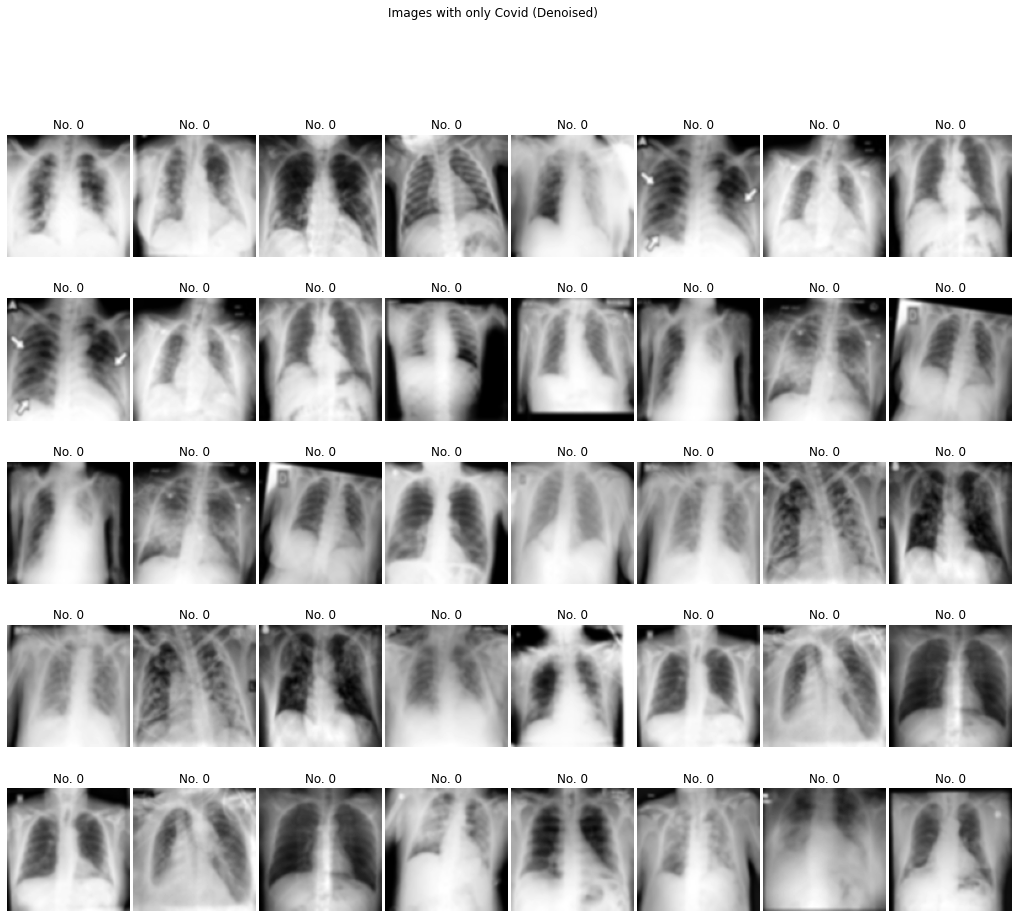

In [80]:
# code to view the images
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(denoised_data_covid[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % denoised_data_covid[image_index][1])

plt.suptitle('Images with only Covid (Denoised)')
plt.show()
plt.close()

In [105]:
np.random.shuffle(data_covid)
dd = np.array(data_covid)
dd.shape

(3615, 2)

In [111]:
with open('covid.npy', 'wb') as f:
    np.save(f,dd)

In [113]:
with open('covid.npy', 'rb') as f:
    covid_arr = np.load(f, allow_pickle=True)

covid_arr.shape

(3615, 2)

### Pneumonia Dataset common

Get common pneumonia dataset from Paul mooney kaggle

name - Chest X-Ray Images (Pneumonia)  <br />
 source - Kaggle  <br />
 link - https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia/activity <br />
 download link - https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497
<br />
<br />

### Dataset 2 - Bacterial Puemonia | 2530
 
 

In [9]:
dir = '../datasets/chest_xray/train/PNEUMONIA'
#regex = re.compile('(^\w*_bacteria_\w*$)/gm')

data_bacterial_pneumonia = [] # initialize an empty numpy array
denoised_data_bacterial_pneumonia = [] # denoised image
for filename in os.listdir(dir):
  if "bacteria" in filename:
    img = cv2.imread(os.path.join(dir,filename), cv2.IMREAD_GRAYSCALE)
    if img is not None:
      new_img_array = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
      data_bacterial_pneumonia.append([new_img_array, BACTERIAL_PUEMONIA_CLASS]) 
      denoised_data_bacterial_pneumonia.append([cv2.GaussianBlur(new_img_array,(5,5),0), BACTERIAL_PUEMONIA_CLASS])
print(len(data_bacterial_pneumonia), "Bacterial PNEUMONIA FILES")

2530 Bacterial PNEUMONIA FILES


In [10]:
np.array(denoised_data_bacterial_pneumonia).shape

(2530, 2)

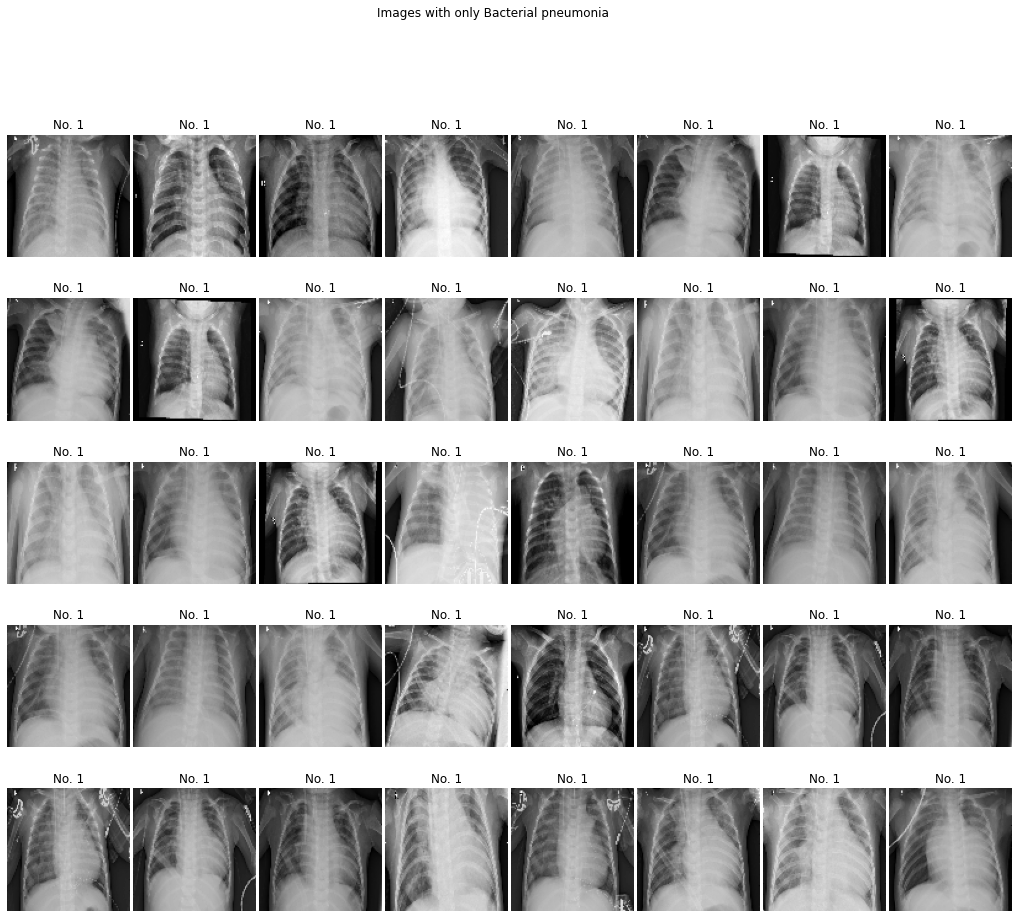

In [11]:
import matplotlib.pyplot as plt
# code to view the images
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(data_bacterial_pneumonia[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % data_bacterial_pneumonia[image_index][1])

plt.suptitle('Images with only Bacterial pneumonia')
plt.show()
plt.close()

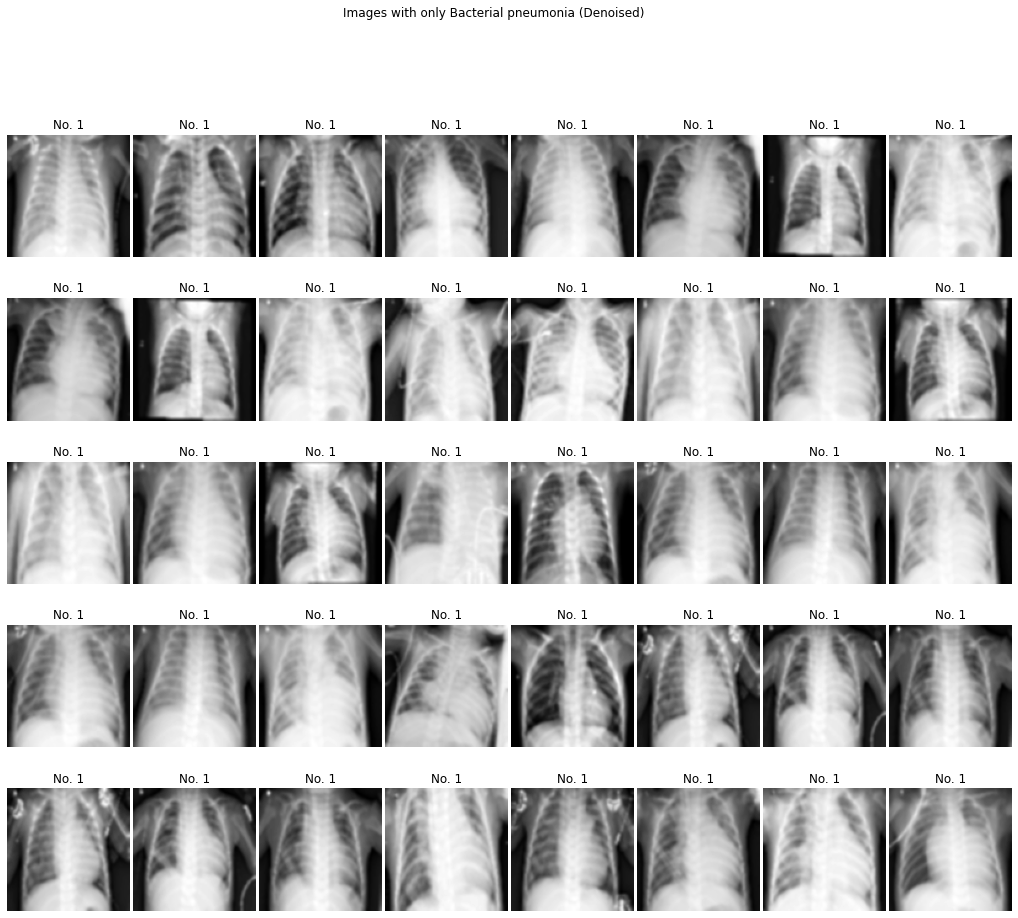

In [12]:
import matplotlib.pyplot as plt
# code to view the images
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(denoised_data_bacterial_pneumonia[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % denoised_data_bacterial_pneumonia[image_index][1])

plt.suptitle('Images with only Bacterial pneumonia (Denoised)')
plt.show()
plt.close()

In [114]:
np.random.shuffle(data_bacterial_pneumonia)
dd = np.array(data_bacterial_pneumonia)
dd.shape

(2530, 2)

In [115]:
with open('bacterial_pneumonia.npy','wb') as f:
    np.save(f, dd)

In [116]:
with open('bacterial_pneumonia.npy', 'rb') as f:
    bacterial_arr = np.load(f, allow_pickle=True)

bacterial_arr.shape

(2530, 2)

### Dataset 3 - Viral Puemonia | 1345
 
 

In [15]:
dir = '../datasets/chest_xray/train/PNEUMONIA'
data_viral_pneumonia = [] # initialize an empty numpy array
denoised_data_viral_pneumonia = [] # denoised image
for filename in os.listdir(dir):
  if 'virus' in filename:
    img = cv2.imread(os.path.join(dir,filename), cv2.IMREAD_GRAYSCALE)
    if img is not None:
      new_img_array = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
      data_viral_pneumonia.append([new_img_array, VIRAL_PUEMONIA_CLASS]) 
      denoised_data_viral_pneumonia.append([cv2.GaussianBlur(new_img_array,(5,5),0), VIRAL_PUEMONIA_CLASS])
print(len(data_viral_pneumonia), "Viral PNEUMONIA FILES")

1345 Viral PNEUMONIA FILES


In [16]:
np.array(denoised_data_viral_pneumonia).shape

(1345, 2)

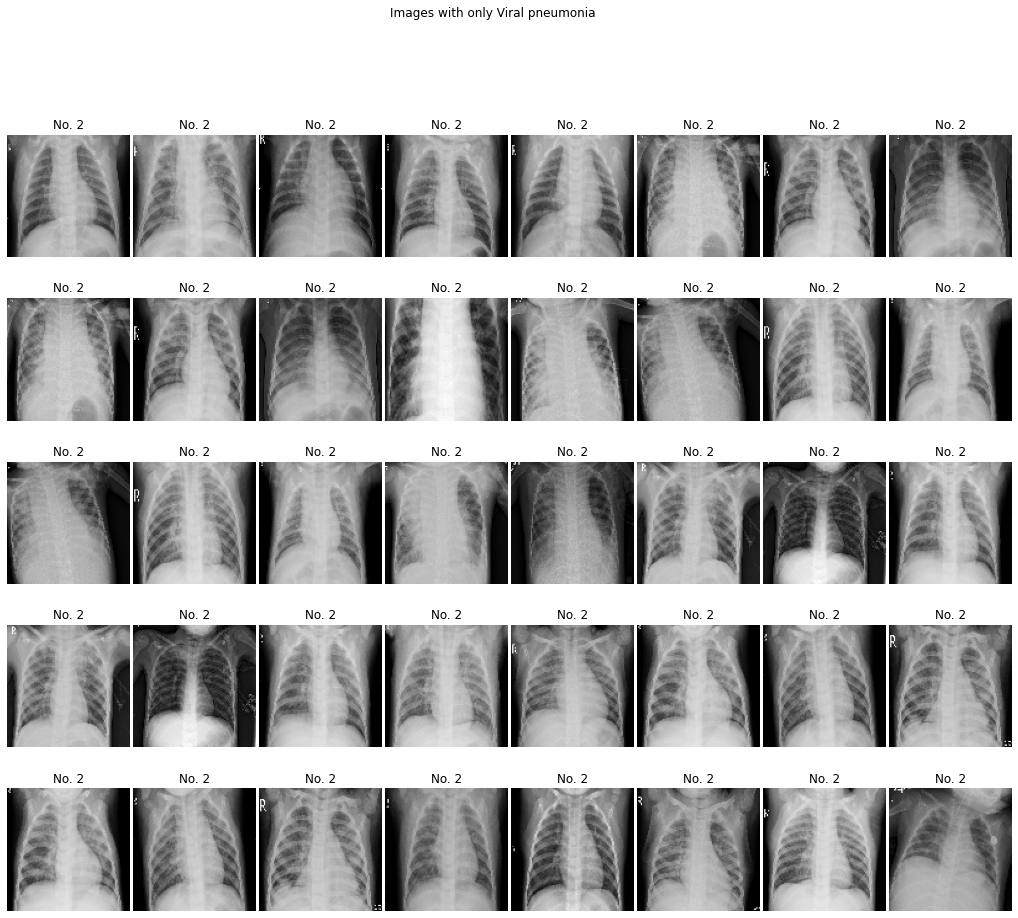

In [17]:
import matplotlib.pyplot as plt
# code to view the images
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(data_viral_pneumonia[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % data_viral_pneumonia[image_index][1])

plt.suptitle('Images with only Viral pneumonia')
plt.show()
plt.close()

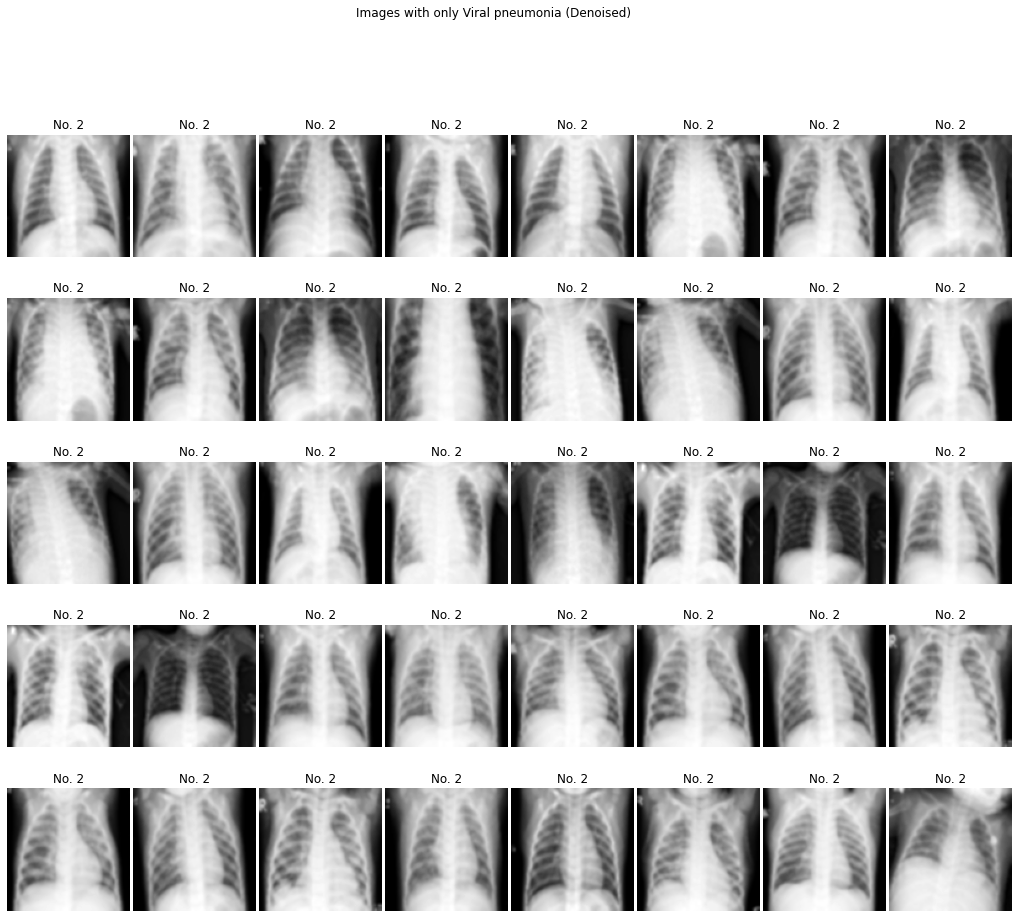

In [18]:
import matplotlib.pyplot as plt
# code to view the images
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(denoised_data_viral_pneumonia[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % denoised_data_viral_pneumonia[image_index][1])

plt.suptitle('Images with only Viral pneumonia (Denoised)')
plt.show()
plt.close()

In [119]:
np.random.shuffle(data_viral_pneumonia)
dd = np.array(data_viral_pneumonia)
dd.shape

(1345, 2)

In [120]:
with open('viral_pneumonia.npy', 'wb') as f:
    np.save(f, dd)

In [122]:
with open('viral_pneumonia.npy', 'rb') as f:
    viral_pneumonia_arr = np.load(f, allow_pickle=True)

viral_pneumonia_arr.shape

(1345, 2)

### Dataset 4 - Tuberculosis | 3500
 
 name - Tuberculosis (TB) Chest X-ray Database  <br />
 source - Kaggle  <br />
 link - https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset <br />
 download link - using kaggle api
<br />
<br />

In [23]:
dir = '../datasets/TB_Chest_Radiography_Database/Tuberculosis'

data_tb = [] # initialize an empty numpy array
denoised_data_tb = [] # denoised image
for filename in os.listdir(dir):
  img = cv2.imread(os.path.join(dir,filename), cv2.IMREAD_GRAYSCALE)
  if img is not None:
    new_img_array = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    data_tb.append([new_img_array, TB_CLASS])
    denoised_data_tb.append([cv2.GaussianBlur(new_img_array,(5,5),0), TB_CLASS])
print(len(os.listdir(dir)), "TB FILES")

3500 TB FILES


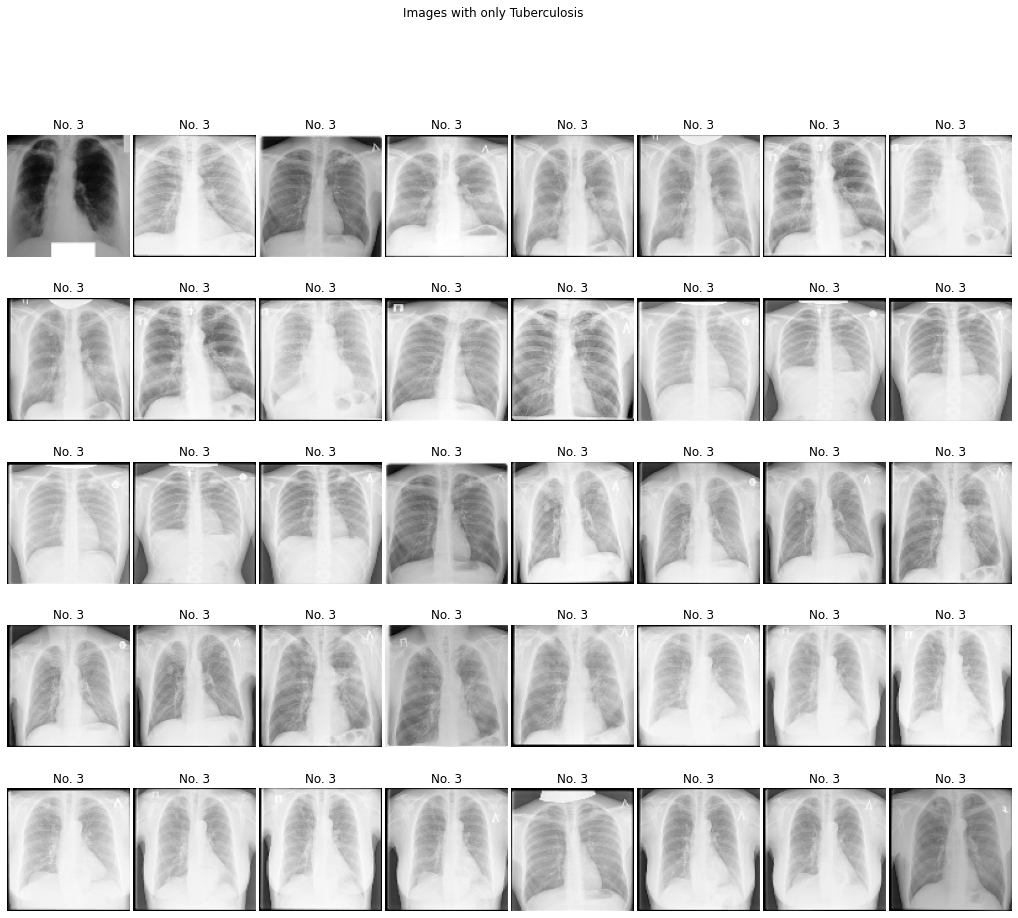

In [37]:
import matplotlib.pyplot as plt
# code to view the images
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(data_tb[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % data_tb[image_index][1])

plt.suptitle('Images with only Tuberculosis')
plt.show()
plt.close()

In [123]:
np.random.shuffle(data_tb)
dd = np.array(data_tb)
dd.shape

(3500, 2)

In [124]:
with open('tb.npy', 'wb') as f:
    np.save(f, dd)

In [125]:
with open('tb.npy', 'rb') as f:
    tb_array = np.load(f, allow_pickle=True)

tb_array.shape

(3500, 2)

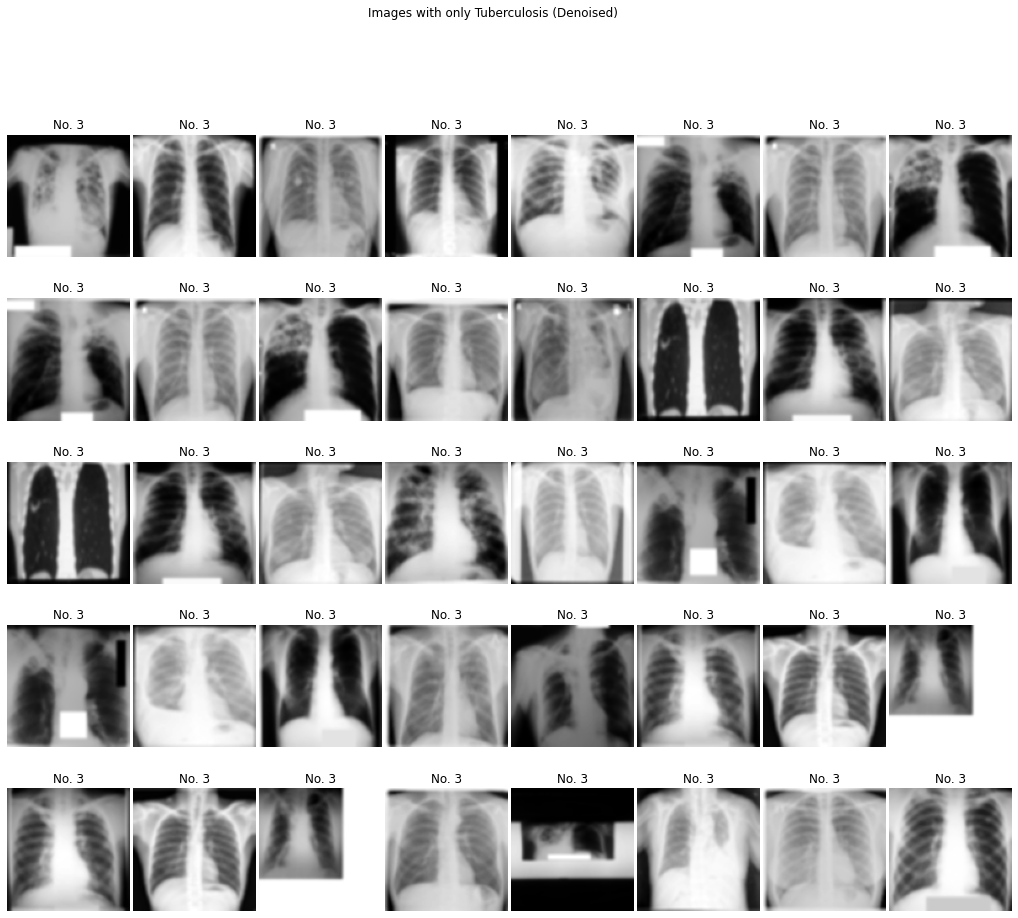

In [26]:
import matplotlib.pyplot as plt
# code to view the images
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(denoised_data_tb[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % denoised_data_tb[image_index][1])

plt.suptitle('Images with only Tuberculosis (Denoised)')
plt.show()
plt.close()

In [126]:
np.random.shuffle(denoised_data_tb)
dd = np.array(denoised_data_tb)
dd.shape

(3500, 2)

In [127]:
with open('denoised_tb.npy', 'wb') as f:
    np.save(f, dd)

### Dataset 5 - Normal | 1341
 
 name - Tuberculosis (TB) Chest X-ray Database  <br />
 source - Kaggle  <br />
 link - https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset <br />
 download link - using kaggle api
<br />
<br />

In [93]:
dir = '../datasets/chest_xray/train/NORMAL'

# data_normal = [] # initialize an empty numpy array
# denoised_data_normal = [] # denoised image
for filename in os.listdir(dir):
  img = cv2.imread(os.path.join(dir,filename), cv2.IMREAD_GRAYSCALE)
  if img is not None:
    new_img_array = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    # data_normal.append([new_img_array, NORMAL_CLASS])
    # denoised_data_normal.append([cv2.GaussianBlur(new_img_array,(5,5),0), NORMAL_CLASS])
print(len(os.listdir(dir)), "NORMAL IMAGES")

1341 NORMAL IMAGES


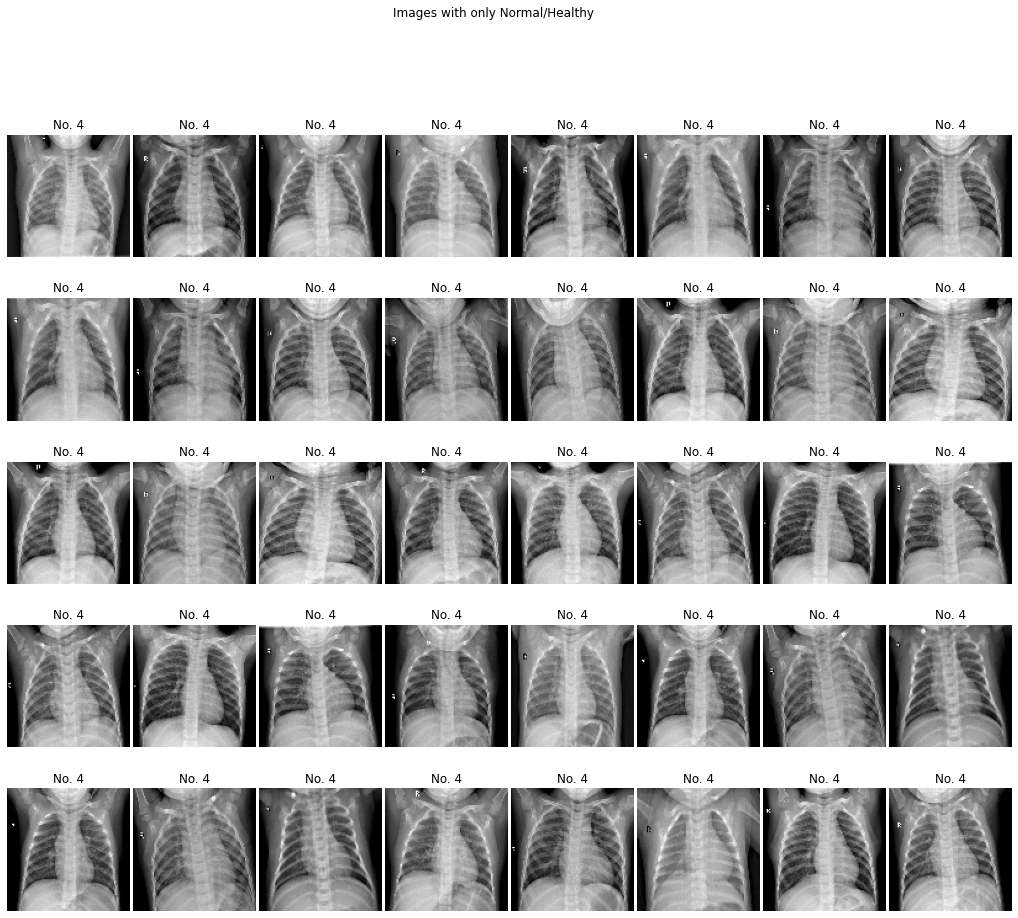

In [42]:
import matplotlib.pyplot as plt
# code to view the images 
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(data_normal[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % data_normal[image_index][1])

plt.suptitle('Images with only Normal/Healthy')
plt.show()
plt.close()

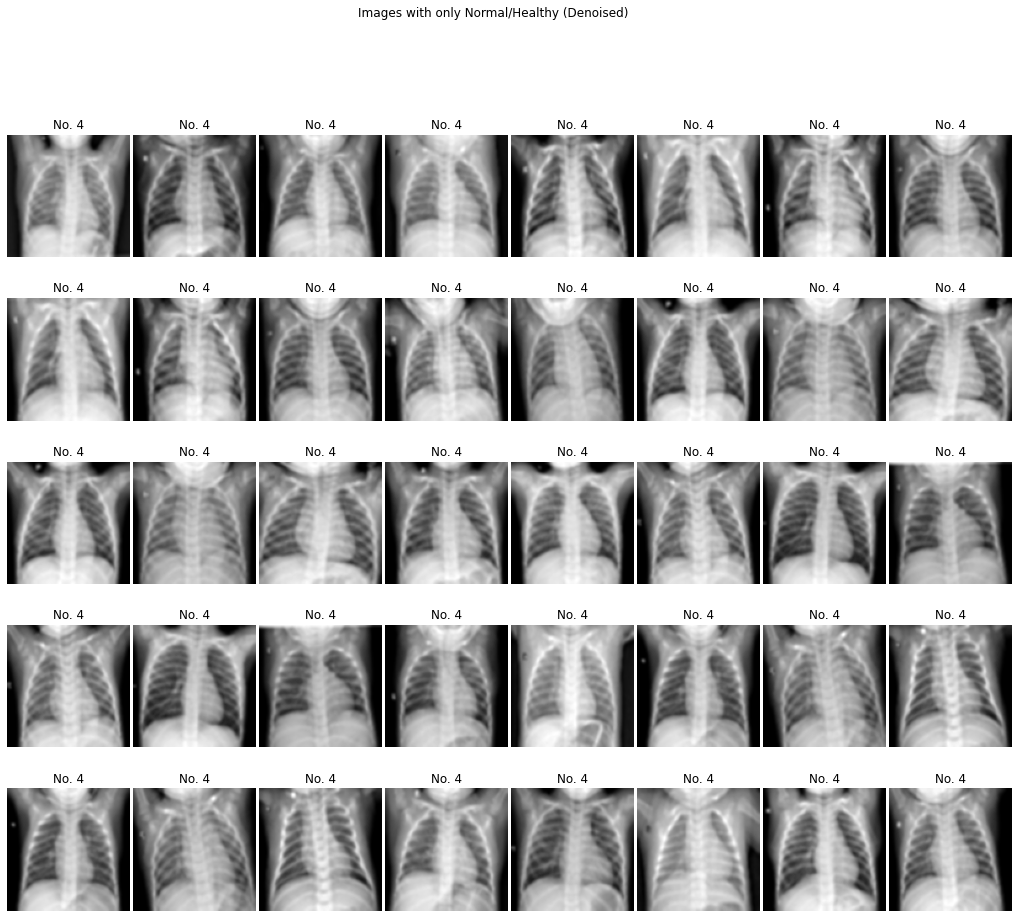

In [43]:
import matplotlib.pyplot as plt
# code to view the images 
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(denoised_data_normal[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % denoised_data_normal[image_index][1])

plt.suptitle('Images with only Normal/Healthy (Denoised)')
plt.show()
plt.close()

In [128]:
np.random.shuffle(data_normal)
dd = np.array(data_normal)
dd.shape

(1341, 2)

In [129]:
with open('normal.npy', 'wb') as f:
    np.save(f, dd)

## Change normal images to one's from TB directory

In [8]:
dir = '../datasets/TB_Chest_Radiography_Database/Normal'

data_normal = [] # initialize an empty numpy array
denoised_data_normal = [] # denoised image
for filename in os.listdir(dir):
  img = cv2.imread(os.path.join(dir,filename), cv2.IMREAD_GRAYSCALE)
  if img is not None:
    new_img_array = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    data_normal.append([new_img_array, NORMAL_CLASS])
    denoised_data_normal.append([cv2.GaussianBlur(new_img_array,(5,5),0), NORMAL_CLASS ])
print(len(os.listdir(dir)), "Normal images")

3500 Normal images


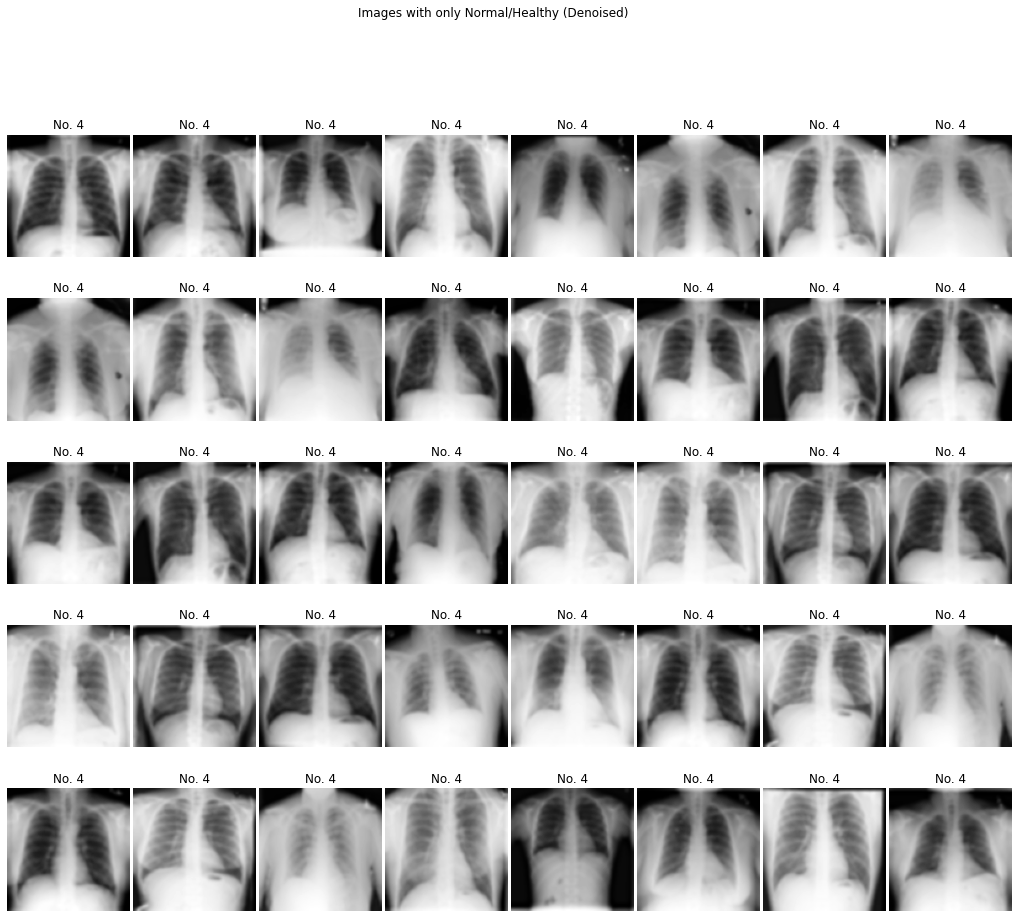

In [9]:
import matplotlib.pyplot as plt
# code to view the images 
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(denoised_data_normal[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % denoised_data_normal[image_index][1])

plt.suptitle('Images with only Normal/Healthy (Denoised)')
plt.show()
plt.close()

In [11]:
np.random.shuffle(data_normal)
dd = np.array(data_normal)
dd.shape

(3500, 2)

In [12]:
with open('../numpy arrays/normal.npy', 'wb') as f:
    np.save(f, dd)

In [13]:
with open('../numpy arrays/normal.npy', 'rb') as f:
    normal = np.load(f, allow_pickle=True)

In [14]:
len(normal)

3500

In [15]:
normal[0]

array([array([[ 21,  24,  34, ..., 139, 148, 159],
       [ 30,  35,  59, ..., 134, 144, 155],
       [ 42,  44,  66, ..., 130, 141, 153],
       ...,
       [ 46,  11,   1, ..., 148, 167, 187],
       [ 47,  20,   1, ..., 154, 160, 190],
       [ 35,  12,   1, ..., 162, 161, 190]], dtype=uint8),
       4], dtype=object)